In [1]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [19]:
digits = load_digits()
digits.data.shape

(1797, 64)

Let's make a neural network with two hidden layers and one input and one output data!

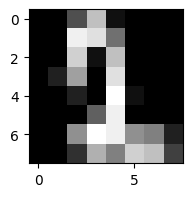

In [20]:
X = digits.data
Y = digits.target
plt.figure(figsize = (2,2))
plt.imshow(X[12].reshape(8,8) , cmap = "gray")

In [23]:
trainX, testX, trainY , testY = train_test_split(X,Y, test_size = 0.2, shuffle = True)
scaler = StandardScaler()
trainXscaled = scaler.fit_transform(trainX)
testXscaled = scaler.transform(testX)
trainXscaled = trainXscaled.T
testXscaled = testXscaled.T

In [42]:
def forward_pass(w,x):
    return (w@x)

def cross_entropy():
    pass
def compute_loss(fn, y_hat, y_true):
    return fn(y_hat, y_true)

def sigmoid_activation(z):
    return 1/(1+np.exp(-z))

def softmax_activation(z):
    return np.exp(-z)/(np.exp(-z)).sum()

def gradient_softmax(z):
    return z*(1-z)



In [43]:
first_layer = np.random.normal(size = (10,64))
output1 = forward_pass(first_layer, trainXscaled)
activated_1 = sigmoid_activation(output1)

In [44]:
activated_1.shape

(10, 1437)

In [46]:
second_layer = np.random.normal(size = (10,10))
output2 = forward_pass(second_layer,activated_1)
activated_2 = sigmoid_activation(output2)

In [49]:
third_layer = np.random.normal(size = (10,10))
output3 = forward_pass(third_layer,activated_2)
activated_3 = softmax_activation(output3)

In [51]:
activated_3.shape

(10, 1437)

In [65]:
alpha = 0.01
# third_layer -= alpha * (activated_3 - trainY)

In [66]:
print(third_layer.shape, activated_2.shape)

(10, 10) (10, 1437)


In [74]:
(alpha * (activated_3 - trainY)).shape

(10, 1437)

In [77]:

trainY.shape

(1437,)

In [81]:
newTrainY = np.zeros((10,trainY.shape[0]))
for i in range(newTrainY.shape[1]):
    newTrainY[trainY[i],i] = 1

In [87]:
(activated_3 - newTrainY).shape

(10, 1437)

In [85]:
activated_3.shape

(10, 1437)

In [88]:
activated_2.shape

(10, 1437)

In [93]:
gradient_thirdlayer = np.zeros((10,10))
for i in range(third_layer.shape[0]):

    gradient_thirdlayer[i,0] = (activated_3 - newTrainY)[0]
third_layer[1,0]*(activated_3 - newTrainY)[0]

# third_layer[:,1]*(activated_3 - newTrainY)[1]
# third_layer[:,2]*(activated_3 - newTrainY)[2]
# third_layer[:,3]*(activated_3 - newTrainY)[3]
# third_layer[:,4]*(activated_3 - newTrainY)[4]

array([-6.32998587e-06, -2.18367103e-06, -8.60833164e-06, ...,
       -7.90446887e-06, -2.47820815e-06, -2.19465064e-06])

In [98]:
third_layer.shape

(10, 10)

(array([1300.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         137.]),
 array([-2.01332107e-05,  2.15383759e-02,  4.30968851e-02,  6.46553942e-02,
         8.62139033e-02,  1.07772412e-01,  1.29330922e-01,  1.50889431e-01,
         1.72447940e-01,  1.94006449e-01,  2.15564958e-01]),
 <BarContainer object of 10 artists>)

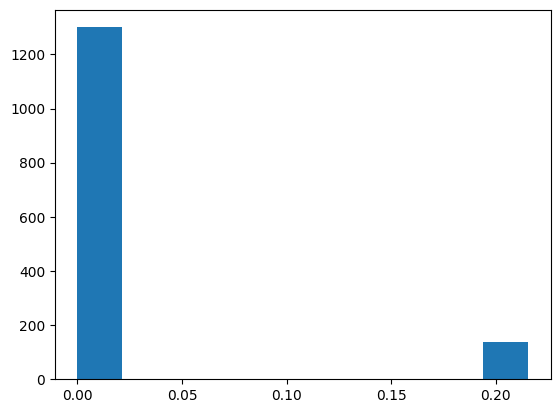